In [391]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve

In [392]:
df = pd.read_csv('../data/ml/df_features.csv')

In [393]:
print("Columnas del dataset:", df.columns.tolist())

Columnas del dataset: ['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan', 'churn_date', 'total_minutes', 'total_messages', 'total_mb', 'messages_included', 'mb_per_month_included', 'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute', 'plan_name', 'extra_minutes', 'extra_messages', 'extra_mb', 'extra_gb', 'extra_calls_cost', 'extra_messages_cost', 'extra_internet_cost', 'total_extra_cost', 'facturacion', 'ratio_extra_minutes', 'ratio_extra_messages', 'ratio_extra_mb']


Elegir las features importantes:

In [ ]:
features = [
    'total_minutes', 
    'total_messages', 
    'total_mb', 
    'minutes_included', 
    'messages_included', 
    'mb_per_month_included', 
    'extra_minutes',
    'extra_messages',
    'extra_mb',
    'age',
]

target = 'facturacion'

Sacar X y Y:

In [395]:
X = df[features]
y = df[target]

Separar el dataset en entrenamiento y prueba

In [396]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

Tamaño del conjunto de entrenamiento: (400, 10)
Tamaño del conjunto de prueba: (100, 10)


Escalar:

In [397]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelos

In [398]:
model_lr = LinearRegression()
model_lr.fit(X_train_scaled, y_train)
y_pred_lr = model_lr.predict(X_test_scaled)

model_sgd = SGDRegressor(max_iter=4000, tol=1e-3, random_state=42)
model_sgd.fit(X_train_scaled, y_train)
y_pred_sgd = model_sgd.predict(X_test_scaled)

model_ridge = Ridge(alpha=1.0)
model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)

model_ridge.fit(X_train_scaled, y_train)
y_pred_ridge = model_ridge.predict(X_test_scaled)

## Evaluacion

In [399]:
def evaluate_model(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, rmse, mae, r2

metrics_lr = evaluate_model(y_test, y_pred_lr)
metrics_sgd = evaluate_model(y_test, y_pred_sgd)
metrics_ridge = evaluate_model(y_test, y_pred_ridge)

Comparar las metricas:

In [400]:
# Crear un DataFrame para comparar las métricas
results = pd.DataFrame({
    'Modelo': ['LinearRegression', 'SGDRegressor', 'Ridge'],
    'MSE': [metrics_lr[0], metrics_sgd[0], metrics_ridge[0]],
    'RMSE': [metrics_lr[1], metrics_sgd[1], metrics_ridge[1]],
    'MAE': [metrics_lr[2], metrics_sgd[2], metrics_ridge[2]],
    'R^2': [metrics_lr[3], metrics_sgd[3], metrics_ridge[3]]
})

print("Comparación de modelos:")
display(results)

Comparación de modelos:


,Modelo,MSE,RMSE,MAE,R^2
0,LinearRegression,5851.286619,76.493703,45.979358,0.985111
1,SGDRegressor,5944.331205,77.099489,46.960957,0.984874
2,Ridge,5888.611605,76.737290,46.807412,0.985016


## Graficos

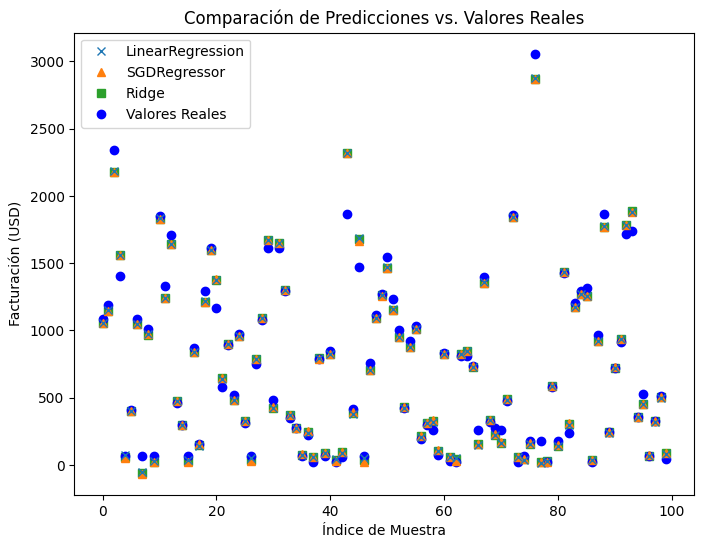

In [410]:
plt.figure(figsize=(8,6))

plt.plot(y_pred_lr, label='LinearRegression', marker='x', linestyle='', zorder=4)
plt.plot(y_pred_sgd, label='SGDRegressor', marker='^', linestyle='', zorder=3)
plt.plot(y_pred_ridge, label='Ridge', marker='s', linestyle='', zorder=2)
plt.plot(y_test.values, label='Valores Reales', marker='o', linestyle='', color='blue', zorder=2)

plt.title("Comparación de Predicciones vs. Valores Reales")
plt.xlabel("Índice de Muestra")
plt.ylabel("Facturación (USD)")
plt.legend()
plt.show()

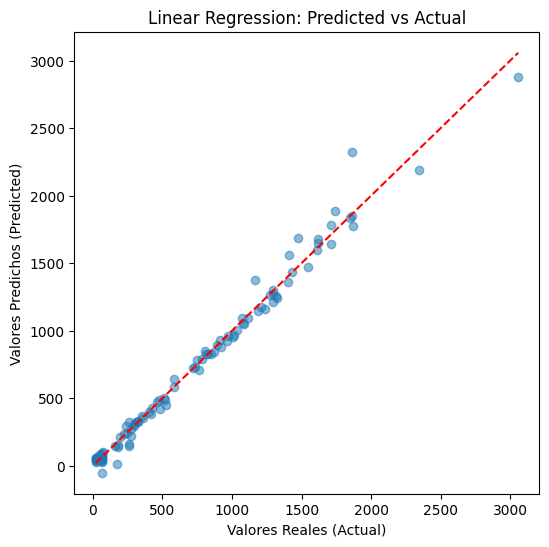

In [402]:
def plot_predicted_vs_actual(y_true, y_pred, model_name="Modelo"):
    plt.figure(figsize=(6,6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], color='red', linestyle='--')
    plt.title(f"{model_name}: Predicted vs Actual")
    plt.xlabel("Valores Reales (Actual)")
    plt.ylabel("Valores Predichos (Predicted)")
    plt.show()

# Ejemplo de uso (para un modelo):
plot_predicted_vs_actual(y_test, y_pred_lr, model_name="Linear Regression")


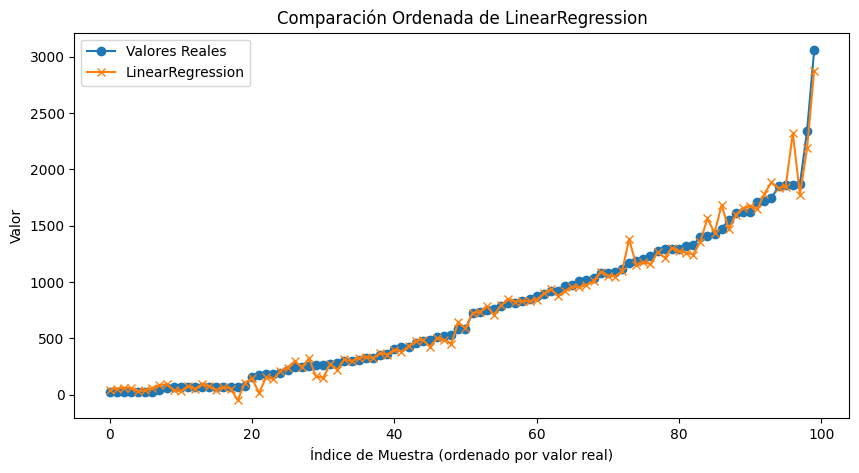

In [ ]:
def plot_sorted_predictions(y_true, y_pred, model_name="Modelo"):
    # Ordenar los índices según los valores reales
    sorted_idx = np.argsort(y_true)
    y_true_sorted = y_true[sorted_idx]
    y_pred_sorted = y_pred[sorted_idx]

    plt.figure(figsize=(10,5))
    plt.plot(y_true_sorted, label="Valores Reales", marker='o')
    plt.plot(y_pred_sorted, label=model_name, marker='x')
    plt.title(f"Comparación Ordenada de {model_name}")
    plt.xlabel("Índice de Muestra (ordenado por valor real)")
    plt.ylabel("Valor")
    plt.legend()
    plt.show()

plot_sorted_predictions(y_test.values, y_pred_lr, "LinearRegression")

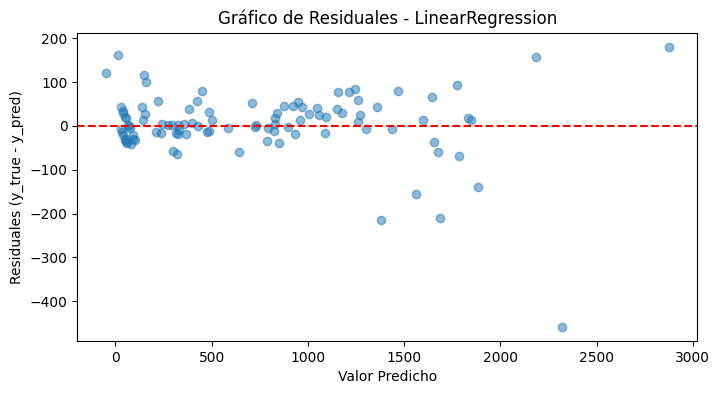

In [ ]:
def plot_residuals(y_true, y_pred, model_name="Modelo"):
    residuals = y_true - y_pred
    plt.figure(figsize=(8,4))
    plt.scatter(y_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.title(f"Gráfico de Residuales - {model_name}")
    plt.xlabel("Valor Predicho")
    plt.ylabel("Residuales (y_true - y_pred)")
    plt.show()

plot_residuals(y_test, y_pred_lr, "LinearRegression")

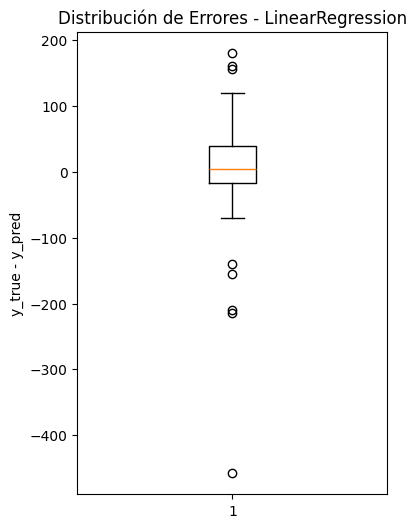

In [ ]:
def plot_error_boxplot(y_true, y_pred, model_name="Modelo"):
    errors = y_true - y_pred
    plt.figure(figsize=(4,6))
    plt.boxplot(errors, vert=True)
    plt.title(f"Distribución de Errores - {model_name}")
    plt.ylabel("y_true - y_pred")
    plt.show()

plot_error_boxplot(y_test, y_pred_lr, "LinearRegression")


## Prueba de overfitting o leakage

RMSE:

In [ ]:
# Linear Regression
y_pred_train_lr = model_lr.predict(X_train)
mse_train_lr = mean_squared_error(y_train, y_pred_train_lr)
rmse_train_lr = sqrt(mse_train_lr)
mse_test_lr = mean_squared_error(y_test, y_pred_lr)
rmse_test_lr = sqrt(mse_test_lr)
print("Linear Regression - Train RMSE:", rmse_train_lr, "Test RMSE:", rmse_test_lr)

# SGDRegressor
y_pred_train_sgd = model_sgd.predict(X_train)
mse_train_sgd = mean_squared_error(y_train, y_pred_train_sgd)
rmse_train_sgd = sqrt(mse_train_sgd)
mse_test_sgd = mean_squared_error(y_test, y_pred_sgd)
rmse_test_sgd = sqrt(mse_test_sgd)
print("SGDRegressor - Train RMSE:", rmse_train_sgd, "Test RMSE:", rmse_test_sgd)

# Ridge
y_pred_train_ridge = model_ridge.predict(X_train)
mse_train_ridge = mean_squared_error(y_train, y_pred_train_ridge)
rmse_train_ridge = sqrt(mse_train_ridge)
mse_test_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_test_ridge = sqrt(mse_test_ridge)
print("Ridge - Train RMSE:", rmse_train_ridge, "Test RMSE:", rmse_test_ridge)


Linear Regression - Train RMSE: 43123615.31248035 Test RMSE: 76.49370313404377
SGDRegressor - Train RMSE: 44627544.26060171 Test RMSE: 77.09948900853588
Ridge - Train RMSE: 43808841.74987289 Test RMSE: 76.73728953237075


c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SGDRegressor was fitted without feature names
  warnings.warn(
c:\Python312\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but Ridge was fitted without feature names
  warnings.warn(


Cross-Validation:

In [411]:
# Linear Regression cross-validation
cv_scores_lr = cross_val_score(model_lr, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_cv_lr = [sqrt(-score) for score in cv_scores_lr]
print("Linear Regression - CV RMSE:", np.mean(rmse_cv_lr), "Std:", np.std(rmse_cv_lr))

# SGDRegressor cross-validation
cv_scores_sgd = cross_val_score(model_sgd, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_cv_sgd = [sqrt(-score) for score in cv_scores_sgd]
print("SGDRegressor - CV RMSE:", np.mean(rmse_cv_sgd), "Std:", np.std(rmse_cv_sgd))

# Ridge cross-validation
cv_scores_ridge = cross_val_score(model_ridge, X, y, scoring='neg_mean_squared_error', cv=5)
rmse_cv_ridge = [sqrt(-score) for score in cv_scores_ridge]
print("Ridge - CV RMSE:", np.mean(rmse_cv_ridge), "Std:", np.std(rmse_cv_ridge))


Linear Regression - CV RMSE: 69.49809630383956 Std: 9.435850510497486
SGDRegressor - CV RMSE: 8.864241577924873e+18 Std: 4.503343006965369e+18
Ridge - CV RMSE: 69.49809556096373 Std: 9.435854917134431


Learning Curves:

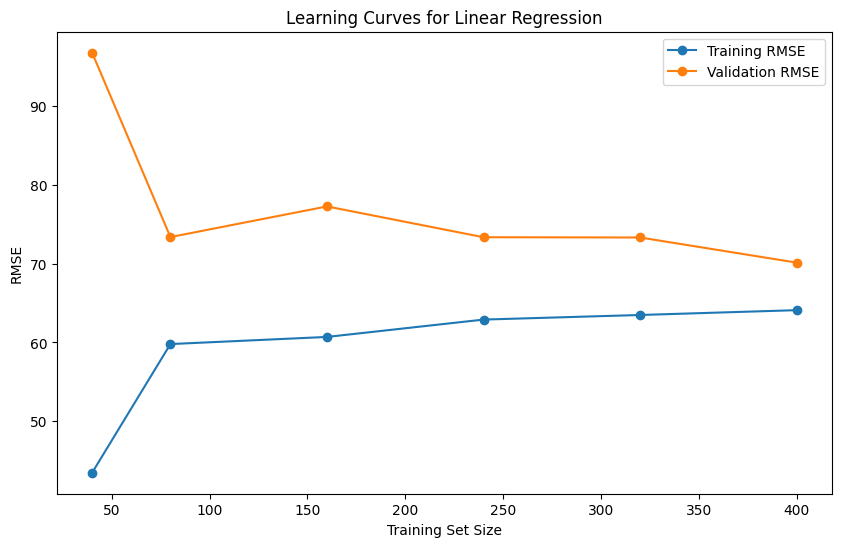

In [408]:
train_sizes, train_scores, val_scores = learning_curve(
    model_lr, X, y, cv=5, scoring='neg_mean_squared_error', 
    train_sizes=[0.1, 0.2, 0.4, 0.6, 0.8, 1.0], shuffle=True, random_state=42
)

train_rmse = [sqrt(-np.mean(score)) for score in train_scores]
val_rmse = [sqrt(-np.mean(score)) for score in val_scores]

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_rmse, label='Training RMSE', marker='o')
plt.plot(train_sizes, val_rmse, label='Validation RMSE', marker='o')
plt.xlabel('Training Set Size')
plt.ylabel('RMSE')
plt.title('Learning Curves for Linear Regression')
plt.legend()
plt.show()

## Score

In [409]:
# Evaluate R² on the test set
score_lr = model_lr.score(X_test_scaled, y_test)
score_sgd = model_sgd.score(X_test_scaled, y_test)
score_ridge = model_ridge.score(X_test_scaled, y_test)

print("LinearRegression R² (test):", score_lr)
print("SGDRegressor R² (test):", score_sgd)
print("Ridge R² (test):", score_ridge)


LinearRegression R² (test): 0.9851106187831902
SGDRegressor R² (test): 0.9848738543919492
Ridge R² (test): 0.9850156403663196
